## Data :
--> lat : String variable, Latitude

--> lng: String variable, Longitude

--> desc: String variable, Description of the Emergency Call

--> zip: String variable, Zipcode

--> title: String variable, Title

--> timeStamp: String variable, YYYY-MM-DD HH:MM:SS

--> twp: String variable, Township

--> addr: String variable, Address

--> e: String variable, Dummy variable (always 1)


## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('dataset\911.csv')

In [3]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


## Categorical & Numerical Features 

In [5]:
num_columns  = data.select_dtypes(include=[np.number]).columns
categ_columns = data.select_dtypes(include='O').columns

In [6]:
num_columns

Index(['lat', 'lng', 'zip', 'e'], dtype='object')

In [7]:
categ_columns

Index(['desc', 'title', 'timeStamp', 'twp', 'addr'], dtype='object')

## Missing Values

In [8]:
data.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [ ]:
sns.heatmap(data.isnull() ,yticklabels=False ,cbar=False ,cmap='viridis')

## Zip Count

In [9]:
data['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

## Township Count

In [10]:
data['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

## Unique Call Titles

In [11]:
data['title'].nunique()

148

## Data Wrangling for Feature Creation

--> In the title column, there's a kind of 'subcategory' or 'reason for call' alloted to each entry (denoted by the text before the colon).

--> The timestamp column can be further segregated into Year, Month and Day of Week too.

### Title Column

In [12]:
data['main-title'] = data['title'].apply(lambda x : x.split(':')[0])

In [13]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,main-title
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [14]:
data['main-title'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: main-title, dtype: int64

<AxesSubplot:xlabel='main-title', ylabel='count'>

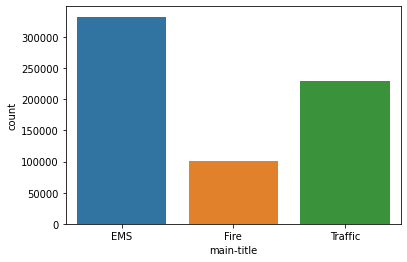

In [15]:
sns.countplot(x=data['main-title'])

### TimeStamp Column

In [16]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [17]:
data['Hour'] = data['timeStamp'].apply(lambda x: x.hour)
data['Month'] = data['timeStamp'].apply(lambda x: x.month)
data['Day of Week'] = data['timeStamp'].apply(lambda x: x.dayofweek)
data['Date'] = data['timeStamp'].apply(lambda x: x.date())


In [18]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,main-title,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3,2015-12-10


In [19]:
# converting day of week to categorical variable

day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed',3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [20]:
data['Day of Week'] = data['Day of Week'].map(day_map)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,main-title,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


## EDA

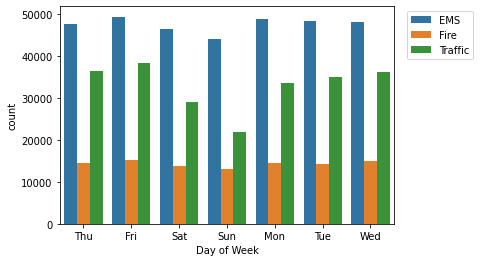

In [21]:
sns.countplot(x=data['Day of Week'] ,hue=data['main-title'])
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()

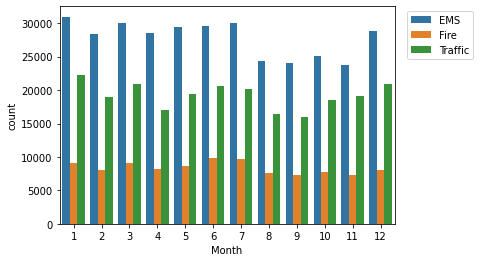

In [22]:
sns.countplot(x=data['Month'] ,hue=data['main-title'])
plt.legend(bbox_to_anchor=(1.25, 1))

### Relation between the number of calls and the month

In [23]:
byMonth = data.groupby(by='Month').count()

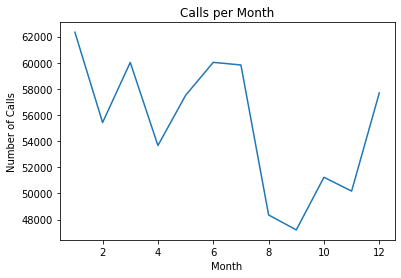

In [24]:
byMonth['e'].plot.line(y='e')

plt.title('Calls per Month')
plt.ylabel('Number of Calls')
plt.show()

### Relation between the number of calls and the date

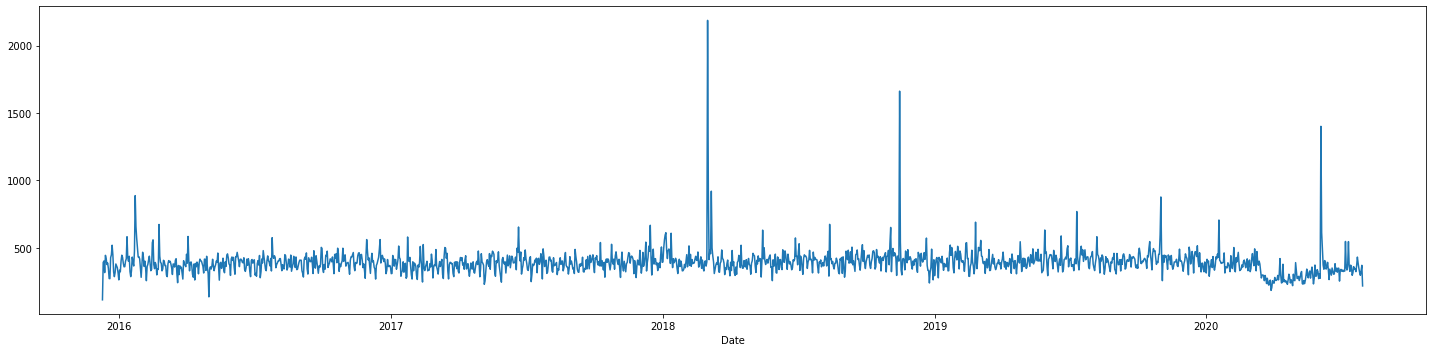

In [25]:
plt.figure(figsize=(20,5))
data.groupby('Date').count()['e'].plot.line(y='e')

plt.legend().remove()
plt.tight_layout()

## Relation between the number of calls and each of the main-title i.e the reason of call

### Traffic

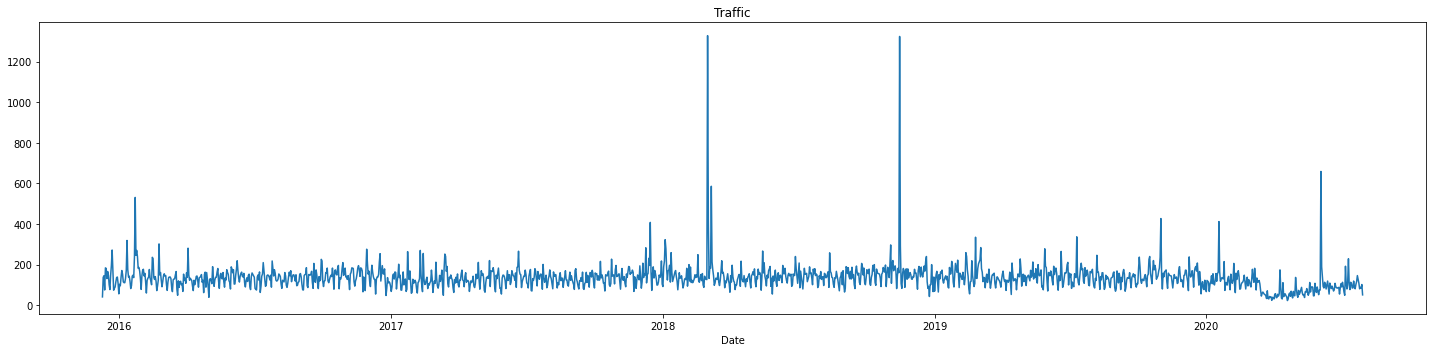

In [26]:
plt.figure(figsize=(20, 5))
data[data['main-title'] == 'Traffic'].groupby('Date').count()['twp'].plot()

plt.title('Traffic')
plt.legend().remove()
plt.tight_layout()


### Fire

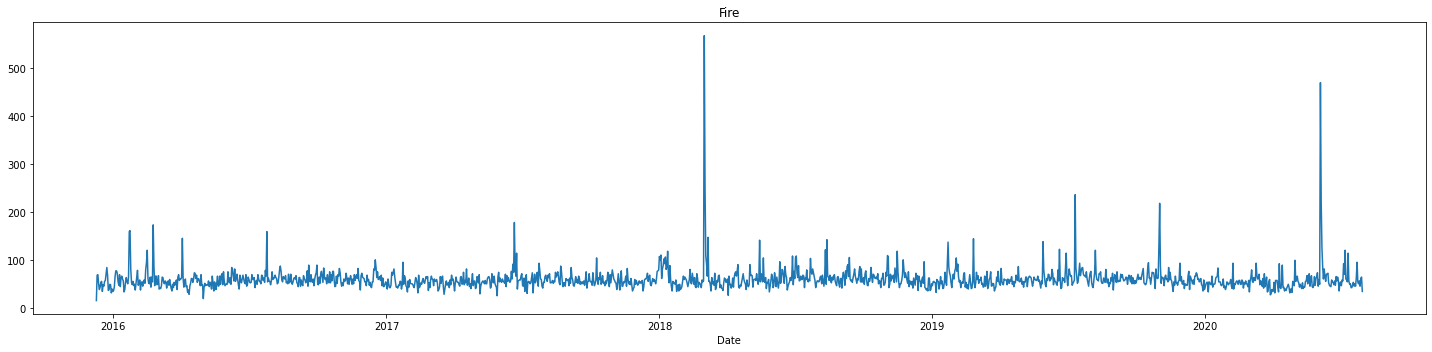

In [27]:
plt.figure(figsize=(20, 5))
data[data['main-title'] == 'Fire'].groupby('Date').count()['twp'].plot()

plt.title('Fire')
plt.legend().remove()
plt.tight_layout()


### EMS

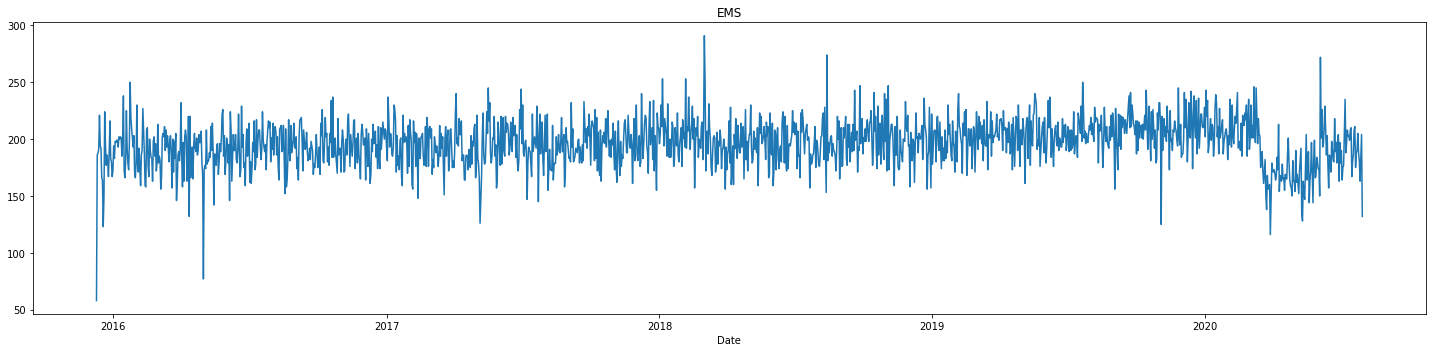

In [28]:
plt.figure(figsize=(20, 5))
data[data['main-title'] == 'EMS'].groupby('Date').count()['twp'].plot()

plt.title('EMS')
plt.legend().remove()
plt.tight_layout()


## Grouping by DayofWeek as Index and Hour as Column

In [29]:
day_hour = data.groupby(by=['Day of Week' ,'Hour']).count()['main-title'].unstack()

In [30]:
day_hour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


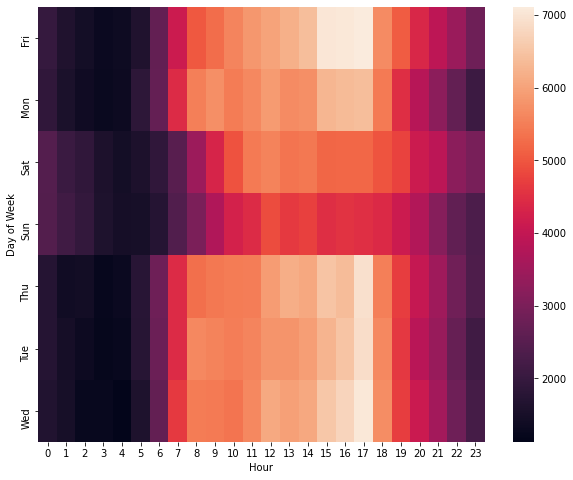

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(day_hour)
plt.show()

## Grouping by DayofWeek as Index and Month as Column

In [32]:
day_month = data.groupby(by=['Day of Week', 'Month']).count()['main-title'].unstack()

In [33]:
day_month.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


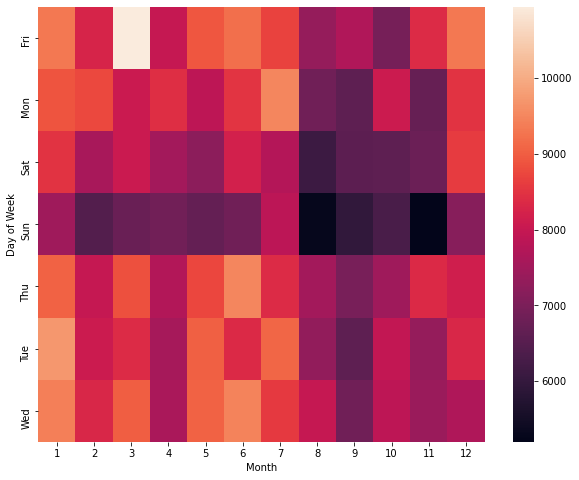

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(day_month)
plt.show()